In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)

pd.options.display.float_format = '{:.4f}'.format

In [3]:
bitcoin = pd.read_csv('coin_Bitcoin.csv')
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.4880,134.0000,134.4440,144.5400,0.0000,1603768864.5000
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.9300,134.0500,144.0000,139.0000,0.0000,1542813125.0000
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.8900,107.7200,139.0000,116.9900,0.0000,1298954593.7500
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.6000,92.2819,116.3800,105.2100,0.0000,1168517495.2500
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.1280,79.1000,106.2500,97.7500,0.0000,1085995168.7500


#### Checking some general information about my dataset

In [4]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
SNo          2862 non-null int64
Name         2862 non-null object
Symbol       2862 non-null object
Date         2862 non-null object
High         2862 non-null float64
Low          2862 non-null float64
Open         2862 non-null float64
Close        2862 non-null float64
Volume       2862 non-null float64
Marketcap    2862 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 223.7+ KB


In [5]:
bitcoin.shape

(2862, 10)

In [6]:
bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.0000,2862.0000,2862.0000,2862.0000,2862.0000,2862.0000,2862.0000
mean,1431.5000,4974.0402,4695.1030,4836.3068,4852.0925,8978474906.0093,85916224373.1124
std,826.3326,7188.8367,6667.1976,6933.5734,6975.1059,16581351322.1482,128741448955.7546
min,1.0000,74.5611,65.5260,68.5050,68.4310,0.0000,778411178.8750
25%,716.2500,426.0478,415.6758,421.2045,420.9892,27862500.0000,5988997103.4300
50%,1431.5000,1197.3350,1164.1750,1180.1000,1182.8100,330195008.0000,19242382456.5000
75%,2146.7500,8138.0466,7703.3575,7924.6123,7926.6969,12967425768.0014,138765817330.4990
max,2862.0000,58330.5721,55672.6095,57532.7389,57539.9437,350967941479.0600,1072263294724.9399


In [7]:
bitcoin.isnull().sum().sum()

0

#### Starting to clean the dataset from the columns we don't need
* This dataset is only for bitcoin coin so the serial number, name and symbol are not required as columns

In [8]:
bitcoin.drop(['SNo', 'Name', 'Symbol'],axis = 1, inplace = True)

In [9]:
bitcoin.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.4880,134.0000,134.4440,144.5400,0.0000,1603768864.5000
1,2013-04-30 23:59:59,146.9300,134.0500,144.0000,139.0000,0.0000,1542813125.0000
2,2013-05-01 23:59:59,139.8900,107.7200,139.0000,116.9900,0.0000,1298954593.7500
3,2013-05-02 23:59:59,125.6000,92.2819,116.3800,105.2100,0.0000,1168517495.2500
4,2013-05-03 23:59:59,108.1280,79.1000,106.2500,97.7500,0.0000,1085995168.7500


* Change the Date from object to datetime object format

In [10]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

In [11]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 7 columns):
Date         2862 non-null datetime64[ns]
High         2862 non-null float64
Low          2862 non-null float64
Open         2862 non-null float64
Close        2862 non-null float64
Volume       2862 non-null float64
Marketcap    2862 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 156.6 KB


In [12]:
bitcoin.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.4880,134.0000,134.4440,144.5400,0.0000,1603768864.5000
1,2013-04-30 23:59:59,146.9300,134.0500,144.0000,139.0000,0.0000,1542813125.0000
2,2013-05-01 23:59:59,139.8900,107.7200,139.0000,116.9900,0.0000,1298954593.7500
3,2013-05-02 23:59:59,125.6000,92.2819,116.3800,105.2100,0.0000,1168517495.2500
4,2013-05-03 23:59:59,108.1280,79.1000,106.2500,97.7500,0.0000,1085995168.7500


* The cryptocurrenies are very sensitive and they can change every second but in this dataset is reported once a day so i will get the year, month, day only from datetime column

In [13]:
bitcoin['Year'] = bitcoin['Date'].apply(lambda x: x.year)
bitcoin['Month'] = bitcoin['Date'].apply(lambda x: x.month)
bitcoin['Day'] = bitcoin['Date'].apply(lambda x: x.day)

In [14]:
bitcoin.drop('Date', axis = 1, inplace = True)
bitcoin.head()

,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day
0,147.4880,134.0000,134.4440,144.5400,0.0000,1603768864.5000,2013,4,29
1,146.9300,134.0500,144.0000,139.0000,0.0000,1542813125.0000,2013,4,30
2,139.8900,107.7200,139.0000,116.9900,0.0000,1298954593.7500,2013,5,1
3,125.6000,92.2819,116.3800,105.2100,0.0000,1168517495.2500,2013,5,2
4,108.1280,79.1000,106.2500,97.7500,0.0000,1085995168.7500,2013,5,3


* The dataset looks clean so far so next step is exploration

#### Exploratory Analysis

* I will check the dataset distribution

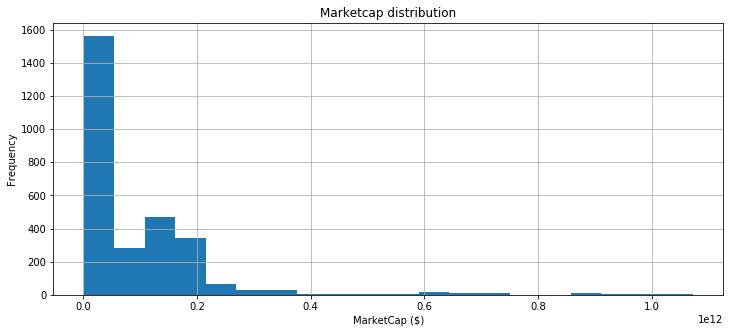

In [15]:
bitcoin['Marketcap'].hist(bins = 20)
plt.title('Marketcap distribution')
plt.xlabel('MarketCap ($)')
plt.ylabel('Frequency');

The dataset looks unimodel skewed right

* Coin during the years

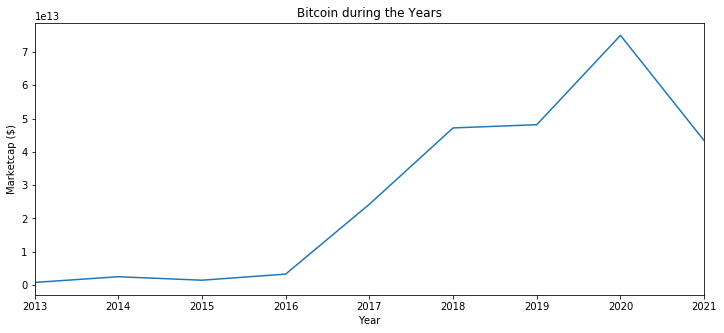

In [16]:
bitcoin.groupby('Year').sum()['Marketcap'].plot()
plt.title('Bitcoin during the Years', fontsize = 12)
plt.xlabel('Year')
plt.ylabel('Marketcap ($)');

The biggest raise Bitcoin had in 2020 but from the graph i can see that the coin becoming growth every year with a boom from 2016 to 2017

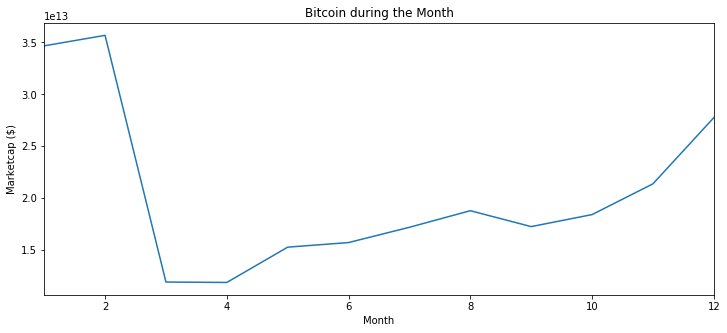

In [17]:
bitcoin.groupby('Month').sum()['Marketcap'].plot()
plt.title('Bitcoin during the Month', fontsize = 12)
plt.xlabel('Month')
plt.ylabel('Marketcap ($)');

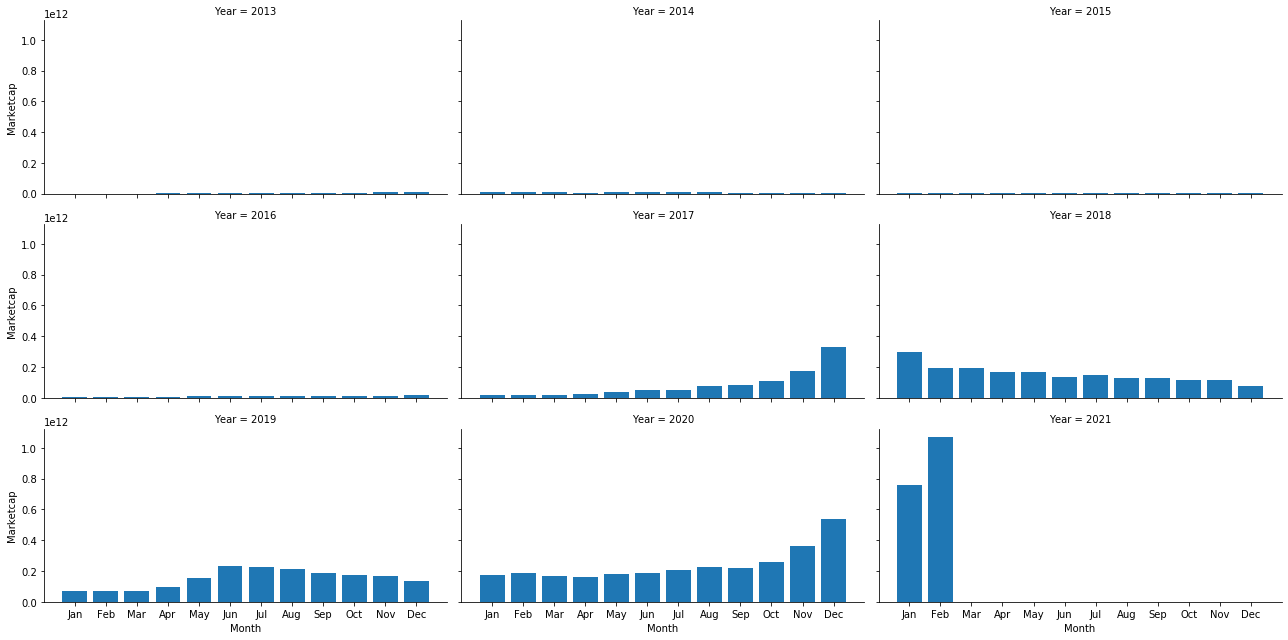

In [18]:
g = sns.FacetGrid(data = bitcoin, col = 'Year', col_wrap=3, aspect = 2)
g.map(plt.bar, 'Month', 'Marketcap')
g.set(xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
      xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

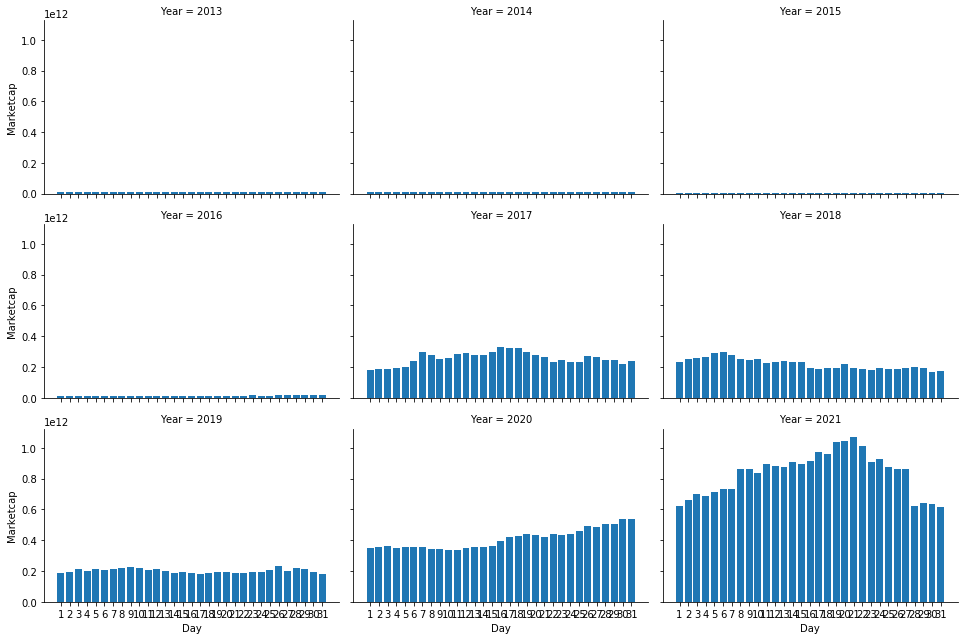

In [19]:
g = sns.FacetGrid(data = bitcoin, col = 'Year', col_wrap=3, aspect=3/2)
g.map(plt.bar, 'Day', 'Marketcap')
g.set(xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31], 
xticklabels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']);

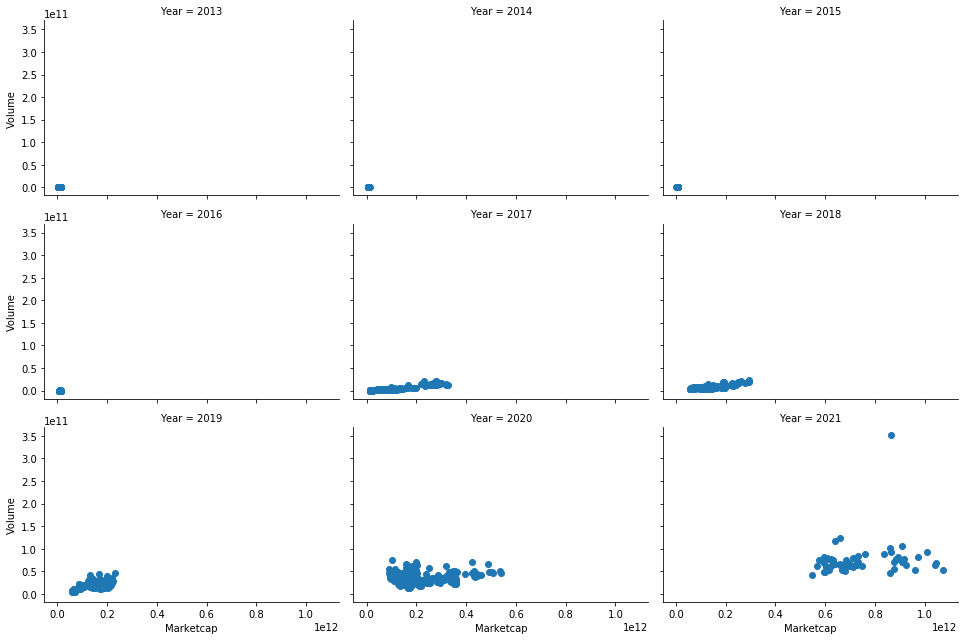

In [20]:
g = sns.FacetGrid(data = bitcoin, col = 'Year', col_wrap=3, aspect = 3/2)
g.map(plt.scatter, 'Marketcap', 'Volume');

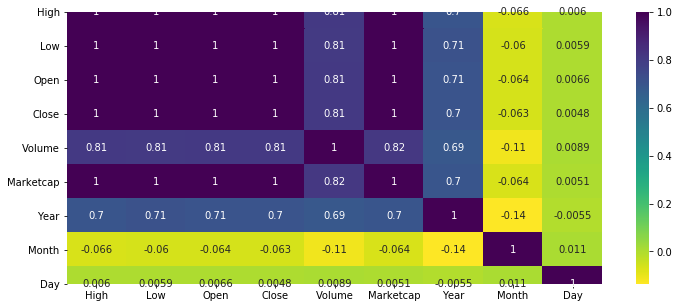

In [21]:
sns.heatmap(bitcoin.corr(), annot=True, cmap = 'viridis_r')

In [22]:
X = bitcoin.drop('Marketcap', axis = 1)
y = bitcoin['Marketcap']

In [46]:
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

In [40]:
print('Linear Score:', r2_score(y_test, linear_pred))
print('Linear Error:', mean_squared_error(y_test, linear_pred))

Linear Score: 0.9989874503010131
Linear Error: 1.9837611504807182e+19


In [41]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
random_pred = random.predict(X_test)

C:\Users\Martin Berberi\AppData\Local\Continuum\anaconda3\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
print('Linear Score:', r2_score(y_test, random_pred))
print('Linear Error:', mean_squared_error(y_test, random_pred))

Linear Score: 0.9992740251536006
Linear Error: 1.4223111200904024e+19


In [43]:
import pickle

In [44]:
file = open('model.pkl', 'wb')
pickle.dump(random, file)

In [32]:
X.head()

,High,Low,Open,Close,Volume,Year,Month,Day
0,147.4880,134.0000,134.4440,144.5400,0.0000,2013,4,29
1,146.9300,134.0500,144.0000,139.0000,0.0000,2013,4,30
2,139.8900,107.7200,139.0000,116.9900,0.0000,2013,5,1
3,125.6000,92.2819,116.3800,105.2100,0.0000,2013,5,2
4,108.1280,79.1000,106.2500,97.7500,0.0000,2013,5,3
